In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec

import requests
from io import StringIO as sio

import baltic as bt

address='https://raw.githubusercontent.com/evogytis/fluB/master/data/mcc%20trees/InfB_NPt_ALLs1.mcc.tre' ## address of example tree
fetch_tree = requests.get(address) ## fetch tree
treeFile=sio(fetch_tree.text) ## stream from repo copy

ll=bt.loadNexus(treeFile,tip_regex='_([0-9\-]+)$') ## treeFile here can alternatively be a path to a local file
ll.treeStats() ## report stats about tree


Tree height: 29.430115
Tree length: 451.887106
strictly bifurcating tree
annotations present

Numbers of objects in tree: 903 (451 nodes and 452 leaves)



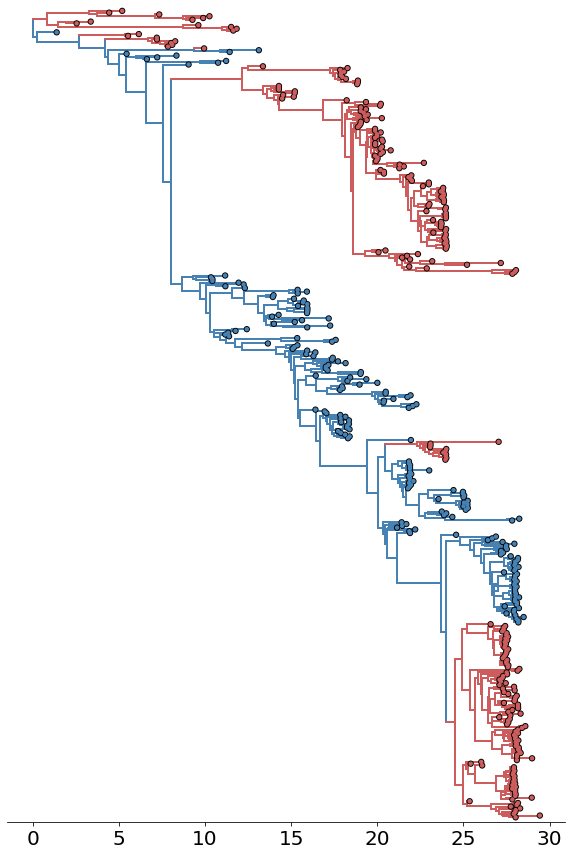

In [2]:
fig = plt.figure(figsize=(10, 15),facecolor='w') ## create figure
gs = gridspec.GridSpec(1,1,wspace=0.0) ## using gridspec by default
ax=plt.subplot(gs[0],facecolor='w') ## create axes

def custom_sort(node):
    """
    Given a branch create a series of conditions to be evaluated when sorting the children of a node.
    """
    condition_1=False if node.is_node() else True
    condition_2=-len(node.leaves) if node.is_node() else -1
    condition_3=node.length
    condition_4=node.childHeight if node.is_node() else 0
    
    return (condition_4)
#     return (condition_1,condition_2,condition_3)

colour=lambda k: 'indianred' if k.traits['PB1']=='V' else 'steelblue'
ll.sortBranches(sort_function=custom_sort)

ll.plotTree(ax,colour=colour)
ll.plotPoints(ax,colour=colour,size=20)

ax.set_yticks([]) ## no y ticks
ax.set_yticklabels([])
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']] ## no spines

ax.tick_params(labelsize=20)
ax.set_ylim(-2,ll.ySpan+2)
plt.show()